**Fraud Detection- Project**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('bank_transactions_data_2.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# Data Cleaning And Preproccesing

In [33]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDate'].dtype

dtype('<M8[ns]')

In [34]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['PreviousTransactionDate'].dtype

dtype('<M8[ns]')

In [35]:
df = pd.get_dummies(df, columns=['Channel'])

In [36]:
df = pd.get_dummies(df, columns=['TransactionType'])

In [37]:
df.head(21)

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Channel_ATM,Channel_Branch,Channel_Online,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,True,False,False,False,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,True,False,False,False,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,19,Student,56,1,1122.35,2024-11-04 08:07:04,False,False,True,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,26,Student,25,1,8569.06,2024-11-04 08:09:06,False,False,True,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,26,Student,198,1,7429.40,2024-11-04 08:06:39,False,False,True,True,False
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Oklahoma City,D000579,117.67.192.211,M054,18,Student,172,1,781.68,2024-11-04 08:06:36,True,False,False,False,True
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Seattle,D000241,140.212.253.222,M019,37,Doctor,139,1,13316.71,2024-11-04 08:10:09,True,False,False,True,False
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Indianapolis,D000500,92.214.76.157,M020,67,Retired,291,1,2796.24,2024-11-04 08:10:55,False,True,False,True,False
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Detroit,D000690,24.148.92.177,M035,51,Engineer,86,1,9095.14,2024-11-04 08:11:14,False,True,False,True,False
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Nashville,D000199,32.169.88.41,M007,55,Doctor,120,1,1021.88,2024-11-04 08:06:32,True,False,False,False,True


In [ ]:
df = pd.get_dummies(df, columns=['CustomerOccupation'])
df.head(11)

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,...,PreviousTransactionDate,Channel_ATM,Channel_Branch,Channel_Online,TransactionType_Credit,TransactionType_Debit,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,70,81,...,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,68,141,...,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,19,56,...,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,26,25,...,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,26,198,...,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Oklahoma City,D000579,117.67.192.211,M054,18,172,...,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Seattle,D000241,140.212.253.222,M019,37,139,...,2024-11-04 08:10:09,True,False,False,True,False,True,False,False,False
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Indianapolis,D000500,92.214.76.157,M020,67,291,...,2024-11-04 08:10:55,False,True,False,True,False,False,False,True,False
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Detroit,D000690,24.148.92.177,M035,51,86,...,2024-11-04 08:11:14,False,True,False,True,False,False,True,False,False
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Nashville,D000199,32.169.88.41,M007,55,120,...,2024-11-04 08:06:32,True,False,False,False,True,True,False,False,False


In [ ]:
df.isnull().sum()

TransactionID                  0
AccountID                      0
TransactionAmount              0
TransactionDate                0
Location                       0
DeviceID                       0
IP Address                     0
MerchantID                     0
CustomerAge                    0
TransactionDuration            0
LoginAttempts                  0
AccountBalance                 0
PreviousTransactionDate        0
Channel_ATM                    0
Channel_Branch                 0
Channel_Online                 0
TransactionType_Credit         0
TransactionType_Debit          0
CustomerOccupation_Doctor      0
CustomerOccupation_Engineer    0
CustomerOccupation_Retired     0
CustomerOccupation_Student     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [59]:
df = df.rename(columns={"Channel_ATM": "Atm", "Channel_Branch": "Branch", "Channel_Online": "Online"})

In [ ]:
df = df.rename(columns={"TransactionType_Credit": "CreditCard", "TransactionType_Debit": "DebitCard", "CustomerOccupation_Doctor": "Doctor","CustomerOccupation_Engineer" : "Engineer","CustomerOccupation_Retired":"Retired","CustomerOccupation_Student":"Student","ATM":"Atm"})
df.head(11)

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,...,PreviousTransactionDate,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,70,81,...,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,68,141,...,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,19,56,...,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,26,25,...,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,26,198,...,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Oklahoma City,D000579,117.67.192.211,M054,18,172,...,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Seattle,D000241,140.212.253.222,M019,37,139,...,2024-11-04 08:10:09,True,False,False,True,False,True,False,False,False
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Indianapolis,D000500,92.214.76.157,M020,67,291,...,2024-11-04 08:10:55,False,True,False,True,False,False,False,True,False
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Detroit,D000690,24.148.92.177,M035,51,86,...,2024-11-04 08:11:14,False,True,False,True,False,False,True,False,False
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Nashville,D000199,32.169.88.41,M007,55,120,...,2024-11-04 08:06:32,True,False,False,False,True,True,False,False,False


In [ ]:
df = df.drop('TransactionID', axis=1)


In [ ]:
df = df.drop('AccountID', axis=1)


In [ ]:
df = df.drop('AccountID', axis=1)


In [ ]:
df = df.drop('DeviceID', axis=1)


In [ ]:
df = df.drop('MerchantID', axis=1)


In [ ]:
df.head(11)

,TransactionAmount,TransactionDate,Location,IP Address,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Atm,Branch,Online,CreditCard,DebitCard,Doctor,Engineer,Retired,Student
0,14.09,2023-04-11 16:29:14,San Diego,162.198.218.92,70,81,1,5112.21,2024-11-04 08:08:08,True,False,False,False,True,True,False,False,False
1,376.24,2023-06-27 16:44:19,Houston,13.149.61.4,68,141,1,13758.91,2024-11-04 08:09:35,True,False,False,False,True,True,False,False,False
2,126.29,2023-07-10 18:16:08,Mesa,215.97.143.157,19,56,1,1122.35,2024-11-04 08:07:04,False,False,True,False,True,False,False,False,True
3,184.50,2023-05-05 16:32:11,Raleigh,200.13.225.150,26,25,1,8569.06,2024-11-04 08:09:06,False,False,True,False,True,False,False,False,True
4,13.45,2023-10-16 17:51:24,Atlanta,65.164.3.100,26,198,1,7429.40,2024-11-04 08:06:39,False,False,True,True,False,False,False,False,True
5,92.15,2023-04-03 17:15:01,Oklahoma City,117.67.192.211,18,172,1,781.68,2024-11-04 08:06:36,True,False,False,False,True,False,False,False,True
6,7.08,2023-02-15 16:36:48,Seattle,140.212.253.222,37,139,1,13316.71,2024-11-04 08:10:09,True,False,False,True,False,True,False,False,False
7,171.42,2023-05-08 17:47:59,Indianapolis,92.214.76.157,67,291,1,2796.24,2024-11-04 08:10:55,False,True,False,True,False,False,False,True,False
8,106.23,2023-03-21 16:59:46,Detroit,24.148.92.177,51,86,1,9095.14,2024-11-04 08:11:14,False,True,False,True,False,False,True,False,False
9,815.96,2023-03-31 16:06:57,Nashville,32.169.88.41,55,120,1,1021.88,2024-11-04 08:06:32,True,False,False,False,True,True,False,False,False


In [48]:
print(df.shape)
df.info()
df.describe()

(2512, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   Location                 2512 non-null   object        
 5   DeviceID                 2512 non-null   object        
 6   IP Address               2512 non-null   object        
 7   MerchantID               2512 non-null   object        
 8   CustomerAge              2512 non-null   int64         
 9   CustomerOccupation       2512 non-null   object        
 10  TransactionDuration      2512 non-null   int64         
 11  LoginAttempts            2512 non-null   int64         
 12  AccountBalance         

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


In [47]:
# Checking unique values for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

TransactionID: 2512 unique values
AccountID: 495 unique values
Location: 43 unique values
DeviceID: 681 unique values
IP Address: 592 unique values
MerchantID: 100 unique values
CustomerOccupation: 4 unique values


# EDA

**Univariate Analysis**

- Numerical Features

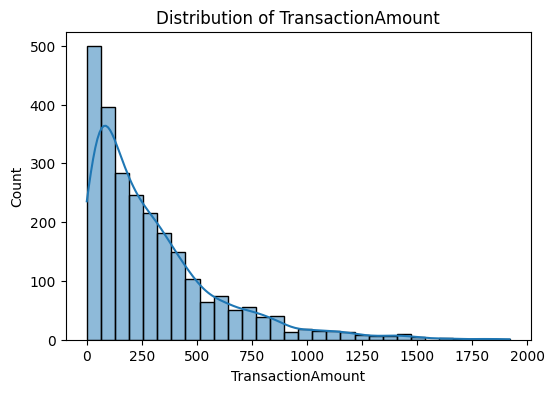

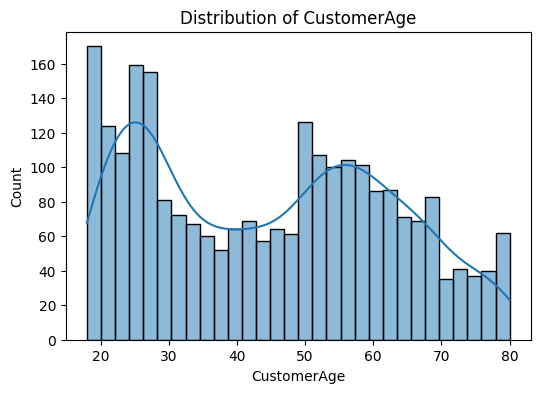

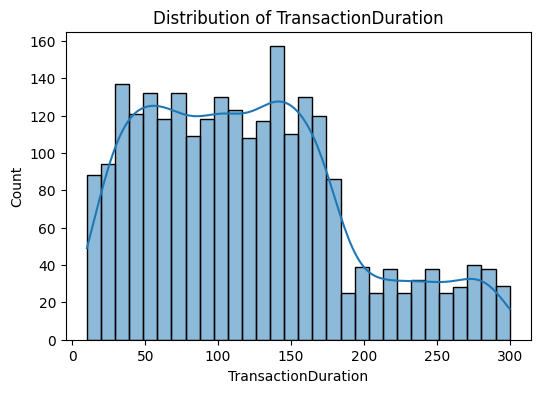

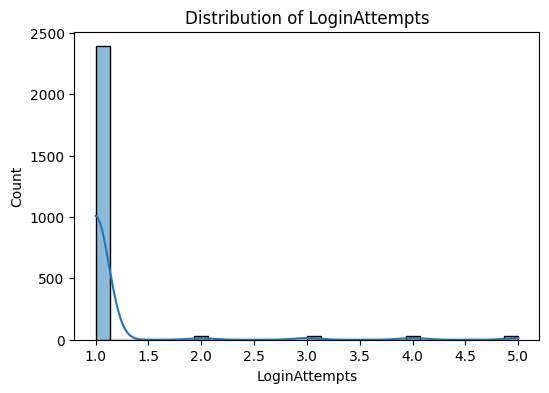

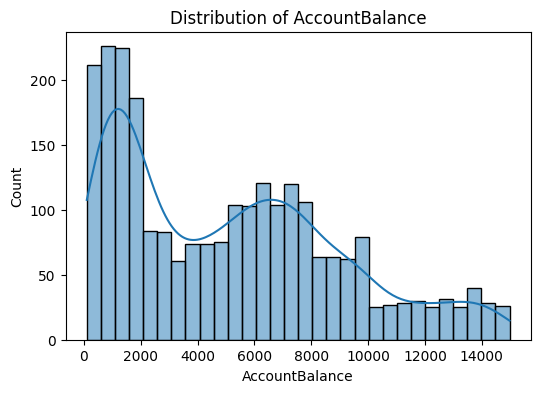

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

- Categorical Features

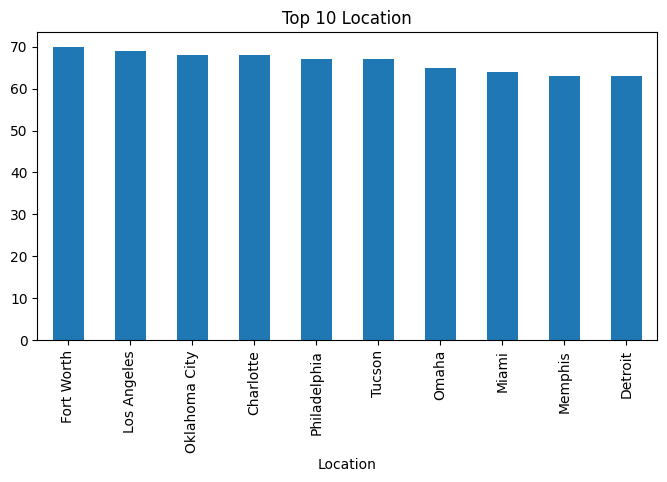

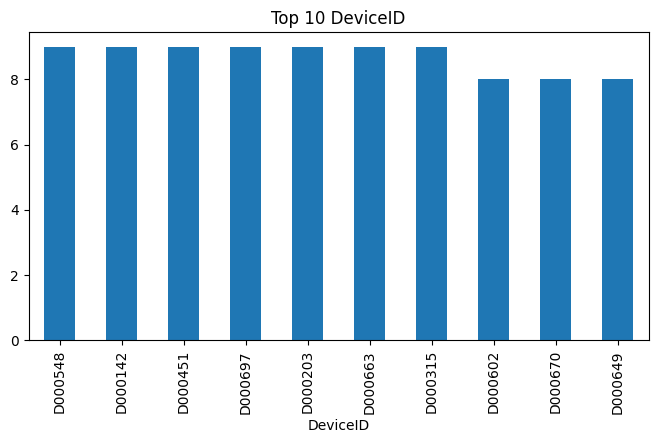

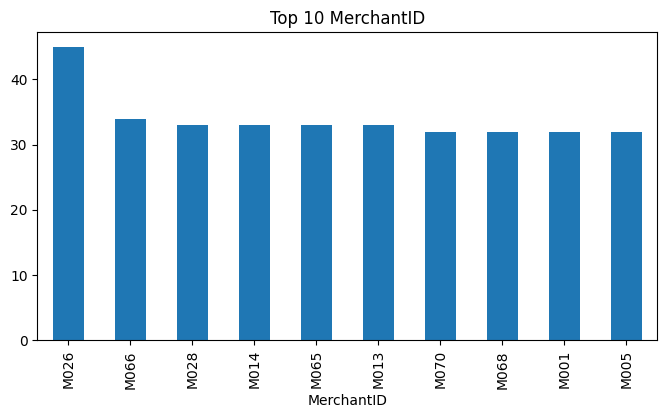

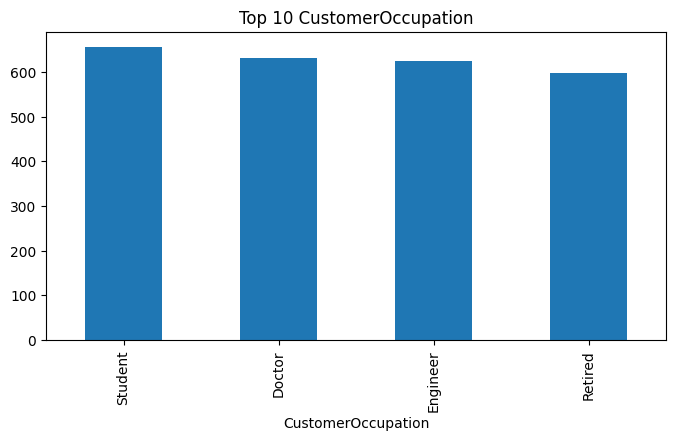

In [50]:
cat_cols = ['Location', 'DeviceID', 'MerchantID', 'CustomerOccupation']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col}")
    plt.show()

**Bivariate Analysis**

- Transaction Amount vs Age / Occupation

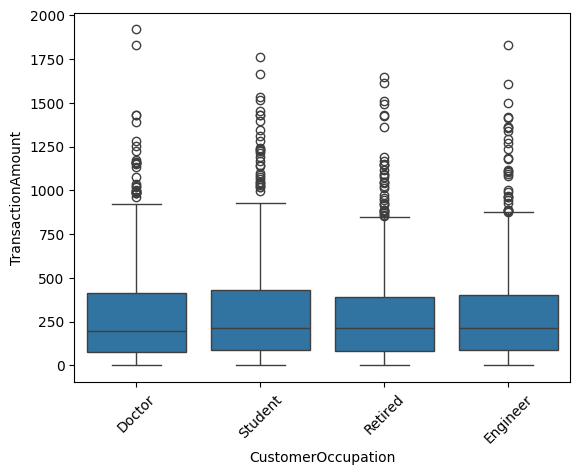

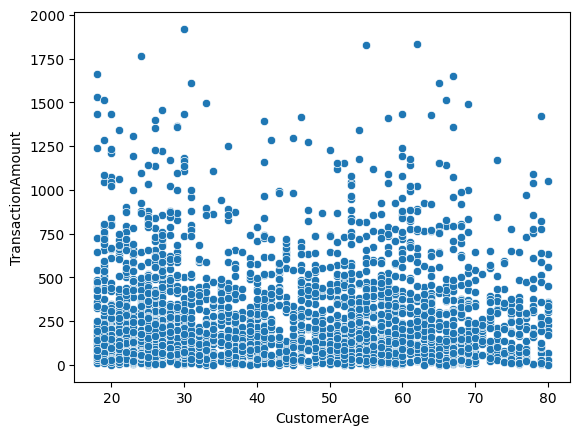

In [51]:
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(x='CustomerAge', y='TransactionAmount', data=df)
plt.show()

- Correlation Heatmap

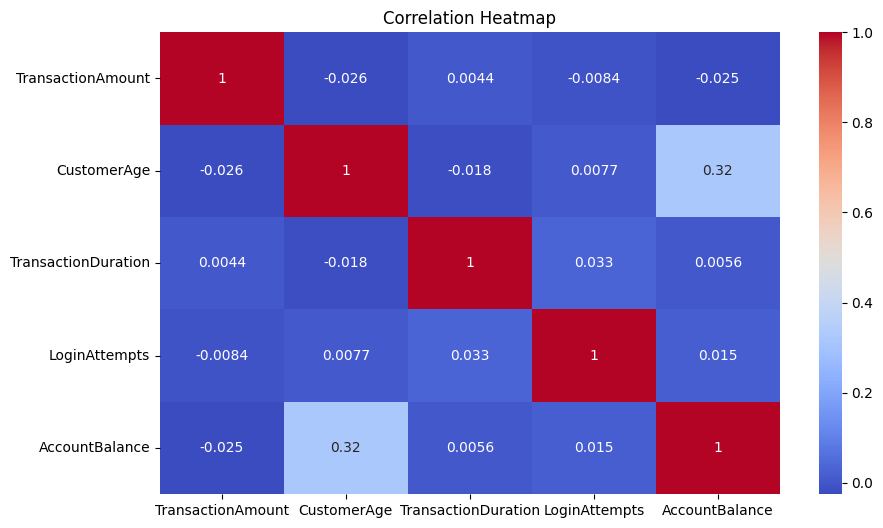

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Time-based Analysis**

- Transactions over time

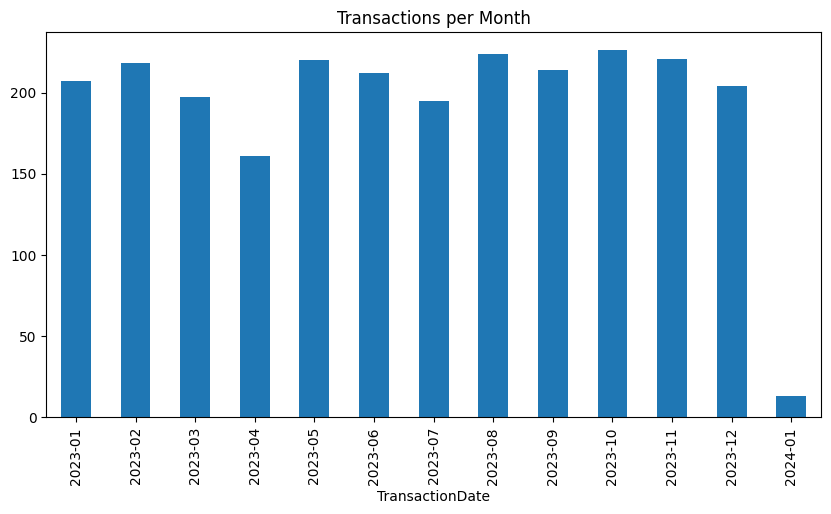

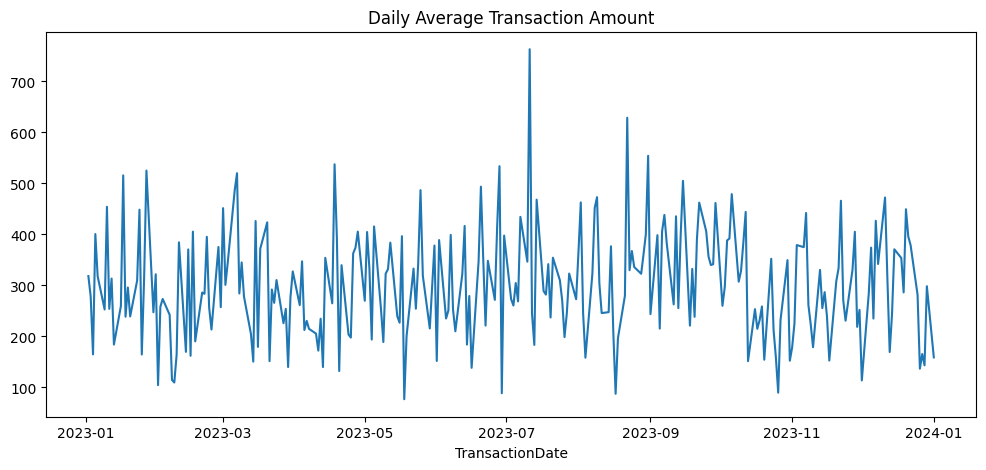

In [53]:
df['TransactionDate'].dt.to_period("M").value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.title("Transactions per Month")
plt.show()

# Average transaction amount over time
df.groupby(df['TransactionDate'].dt.date)['TransactionAmount'].mean().plot(figsize=(12,5))
plt.title("Daily Average Transaction Amount")
plt.show()

**Channel & Transaction Type**

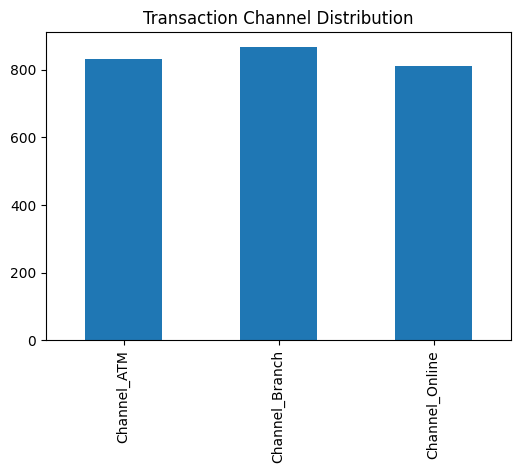

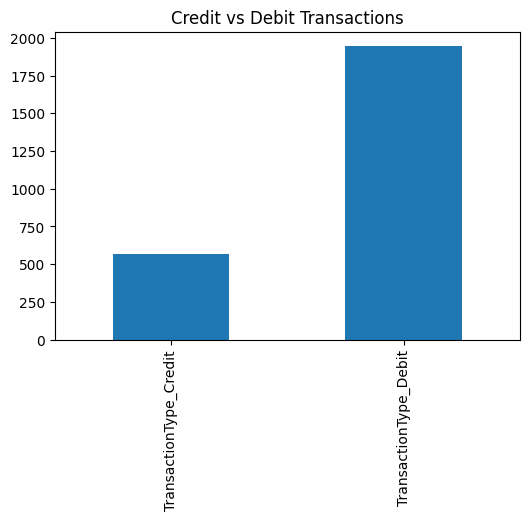

In [54]:
channel_cols = ['Channel_ATM', 'Channel_Branch', 'Channel_Online']
type_cols = ['TransactionType_Credit', 'TransactionType_Debit']

# Channels
df[channel_cols].sum().plot(kind='bar', figsize=(6,4))
plt.title("Transaction Channel Distribution")
plt.show()

# Credit vs Debit
df[type_cols].sum().plot(kind='bar', figsize=(6,4))
plt.title("Credit vs Debit Transactions")
plt.show()

**Account Activity**

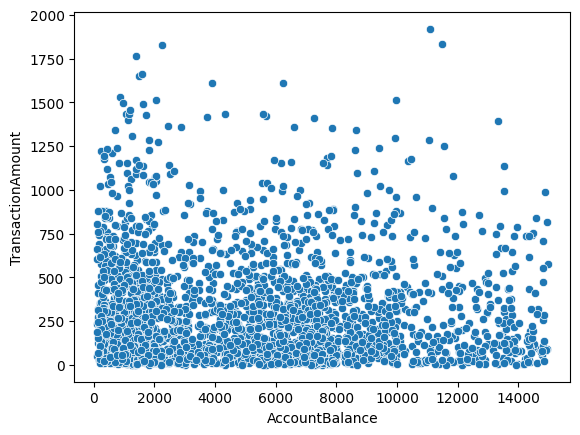

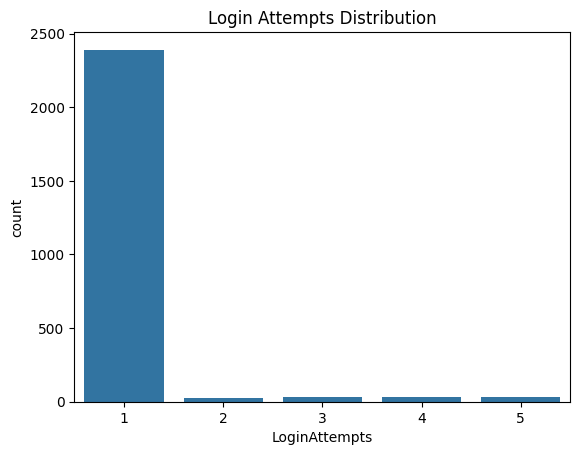

In [55]:
# Balance vs Transaction Amount
sns.scatterplot(x='AccountBalance', y='TransactionAmount', data=df)
plt.show()

# Login Attempts distribution
sns.countplot(x='LoginAttempts', data=df)
plt.title("Login Attempts Distribution")
plt.show()

**Outlier Analysis**

- TransactionAmount, TransactionDuration, LoginAttempts, AccountBalance can have extreme values because of numerical data. Taking an example of TransactionAmount.

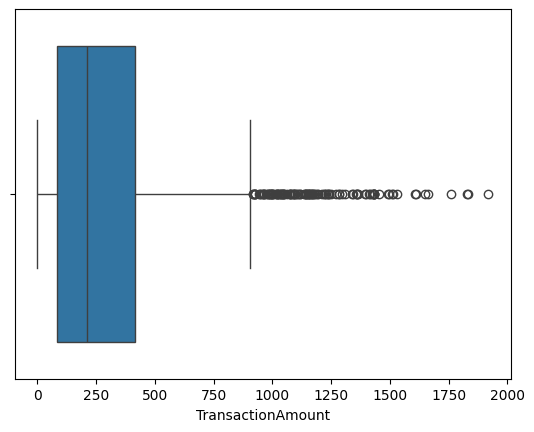

Number of outliers in TransactionAmount: 113


In [57]:
# Boxplot for outlier detection
sns.boxplot(x=df['TransactionAmount'])
plt.show()

# IQR method
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TransactionAmount'] < (Q1 - 1.5 * IQR)) |
              (df['TransactionAmount'] > (Q3 + 1.5 * IQR))]

print("Number of outliers in TransactionAmount:", outliers.shape[0])

**Skewness Analysis**

- Transaction data has right-skew.

- Skewed features can affect statistical tests and ML models, so used log transformation.

TransactionAmount      1.740107
TransactionDuration    0.599432
LoginAttempts          5.173491
AccountBalance         0.601201
dtype: float64


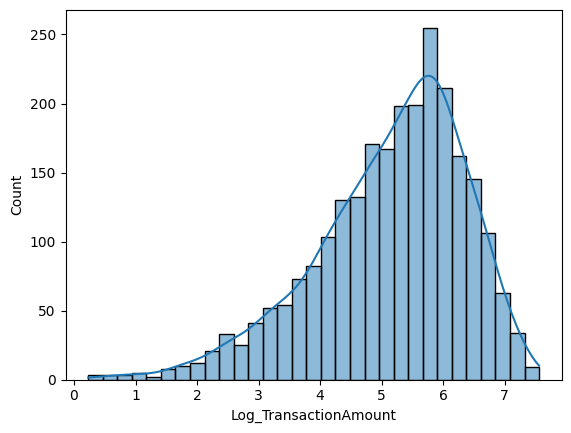

In [58]:
# Skewness check
print(df[['TransactionAmount','TransactionDuration','LoginAttempts','AccountBalance']].skew())

# Log transformation for skewed features
import numpy as np
df['Log_TransactionAmount'] = np.log1p(df['TransactionAmount'])
sns.histplot(df['Log_TransactionAmount'], kde=True)
plt.show()